In [ ]:
import locale
locale.getpreferredencoding = (lambda *args: ['en_US', 'UTF-8'])

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp310-cp310-linux_x86_64.whl size=44090 sha256=607510b2244bb1b29ec170ab48690ed3c23fa1ddaf55228cc77b66fb47f5dfee
  Stored in directory: /root/.cache/pip/wheels/70/83/31/975b737609aba39a4099d471d5684141c1fdc3404f97e7f68a
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.6.9 requires PyYAML>=5.4.1, but you have pyyaml 5.1 which is incompatible.
dask 2022.12.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatibl

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
DATADIR="/content"

In [ ]:
!mkdir -p $DATADIR/hindi-genome

In [ ]:
!cd $DATADIR/hindi-genome

In [ ]:
!curl --remote-name-all https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-3267/hindi-visual-genome-11.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4430M  100 4430M    0     0  19.8M      0  0:03:43  0:03:43 --:--:-- 22.4M


In [ ]:
!unzip hindi-visual-genome-11.zip

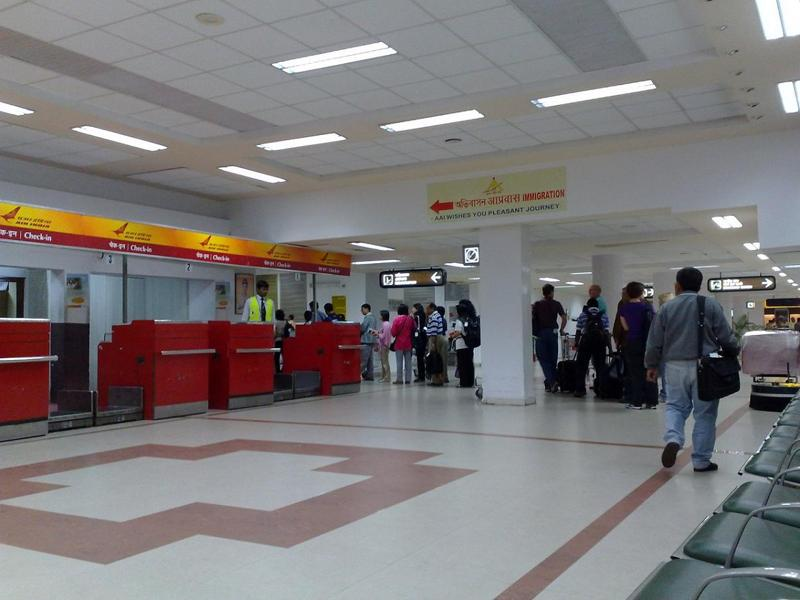

In [ ]:
im = cv2.imread("/content/hindi-visual-genome-11/hindi-visual-genome-dev.images/1000.jpg")
cv2_imshow(im)

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)


[04/29 16:59:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:00, 183MB/s]                           


In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0, 28,  0,  0,  0,
         0], device='cuda:0')
Boxes(tensor([[646.8627, 265.7382, 738.5004, 471.4630],
        [530.2318, 281.9799, 567.9708, 395.3579],
        [569.2726, 284.0098, 610.9790, 396.7519],
        [693.1976, 294.4384, 742.5550, 402.2659],
        [388.4977, 304.3082, 414.9354, 384.4890],
        [612.8003, 281.1375, 657.0278, 411.7248],
        [242.1276, 279.5258, 275.2901, 324.1855],
        [448.9076, 301.4925, 478.3551, 387.5415],
        [377.4165, 308.7533, 391.3228, 383.6180],
        [424.5498, 301.7852, 448.4085, 384.0051],
        [631.6520, 385.1017, 800.0000, 599.1589],
        [411.3647, 300.3883, 429.5382, 382.7699],
        [358.3340, 302.7507, 376.9328, 379.6140],
        [320.4984, 302.6949, 344.3140, 321.7384],
        [555.2891, 359.2095, 582.1135, 393.4078],
        [273.2022, 308.9592, 289.4783, 348.1262],
        [307.2300, 300.9396, 325.7709, 322.8335],
        [285.1132, 313.8935, 297.1

In [ ]:
pred=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes

In [ ]:
def Image_extractor(img):
  im = cv2.imread(img)
  entities=[]
  outputs = predictor(im)
  val=outputs["instances"].pred_classes
  for i in val:
    entities.append(pred[i.item()])
  return set(entities)

In [ ]:
data_list = []

with open('/content/hindi-visual-genome-11/hindi-visual-genome-train.txt', 'r') as file:
    for line in file:
        # Split the line by tabs and get the first two and fifth elements
        elements = line.strip().split('\t')[:2] + [line.strip().split('\t')[5], line.strip().split('\t')[6]]
        # Append the elements to the data_list
        data_list.append(elements)

In [ ]:
data_test_list = []

with open('/content/hindi-visual-genome-11/hindi-visual-genome-test.txt', 'r',encoding='utf-8') as file:
    for line in file:
        # Split the line by tabs and get the first two and fifth elements
        elements = line.strip().split('\t')[:2] + [line.strip().split('\t')[5], line.strip().split('\t')[6]]
        # Append the elements to the data_list
        data_test_list.append(elements)

['780', '401', 'the orange colored traffic cone', 'नारंगी रंग यातायात शंकु']


In [ ]:
print(data_list[0])

['11', '45', 'it is an indoor scene', 'यह एक इनडोर दृश्य है']


In [ ]:
!python -m spacy download en_core_web_lg

2023-04-29 17:00:00.449029: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg")


In [ ]:
def findnamedentities(val):
  returnval=[]
  text1= nlp(val)
  for word in text1.ents:
    returnval.append(word.text)
  return returnval

In [ ]:
print(data_list[0])

['11', '45', 'it is an indoor scene', 'यह एक इनडोर दृश्य है']


In [ ]:
finaltrainingdata=[]
for i in data_list:
  sentence=i[2]
  named_entities=[]
  entities=Image_extractor("/content/hindi-visual-genome-11/hindi-visual-genome-train.images"+'/'+i[0]+'.jpg')
  named_entities=findnamedentities(i[2])
  if(len(named_entities)>0):
    for j in named_entities:
       masked_sentence = sentence.replace(j, "<mask>")
    print(masked_sentence)
    masked_sentence=masked_sentence+' #'
    for k in entities:
      masked_sentence=masked_sentence+k
      masked_sentence=masked_sentence+' ,'
    finaltrainingdata.append(masked_sentence)
  else:
    sentence=sentence+' #'
    for k in entities:
      sentence=sentence+k
      sentence=sentence+' ,'
    finaltrainingdata.append(sentence)



In [ ]:
finaltestdata=[]
for i in data_test_list:
  sentence=i[2]
  named_entities=[]
  entities=Image_extractor("/content/hindi-visual-genome-11/hindi-visual-genome-test.images"+'/'+i[0]+'.jpg')
  named_entities=findnamedentities(i[2])
  if(len(named_entities)>0):
    for j in named_entities:
       masked_sentence = sentence.replace(j, "<mask>")
    print(masked_sentence)
    masked_sentence=masked_sentence+' #'
    for k in entities:
      masked_sentence=masked_sentence+k
      masked_sentence=masked_sentence+' ,'
    finaltestdata.append(masked_sentence)
  else:
    sentence=sentence+' #'
    for k in entities:
      sentence=sentence+k
      sentence=sentence+' ,'
    finaltestdata.append(sentence)

In [ ]:
with open('train.txt', 'w', encoding='utf-8') as f:
    for item in finaltrainingdata:
        f.write(item + '\n')

In [ ]:
with open('train_target.txt', 'w', encoding='utf-8') as f:
    for item in data_list:
        f.write(item[3] + '\n')

In [ ]:
with open('test.txt', 'w', encoding='utf-8') as f:
    for item in finaltestdata:
        f.write(item + '\n')

In [ ]:
with open('test_target.txt', 'w', encoding='utf-8') as f:
    for item in data_test_list:
        f.write(item[3] + '\n')

In [ ]:
!pip install transformers
!pip install datasets
!pip install sacrebleu
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 9.9 MB/s eta 0:00:

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datasets import load_data
from transformers import (
    M2M100Config, M2M100ForConditionalGeneration, M2M100Tokenizer,
    Seq2SeqTrainingArguments, Seq2SeqTrainer
  )

import torch
from torch.utils.data import random_split
import datasets
import pandas as pd
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
import numpy as np
from datasets import load_metric
import gc
import torch
from transformers import AutoTokenizer
import datasets

ValueError: ignored

In [ ]:
def load_test():
  data = []
  with open("/content/test.txt") as f1, open("/content/test_target.txt") as f2:
      for src, tgt in zip(f1, f2):
        data.append(
            {
                "translation": {
                    "en": src.strip(),
                    "hi": tgt.strip()
                }
            }
        )
  print(f'total size of data is {len(data)}')
  tdata = pd.DataFrame(data)
  tdata = tdata.reset_index()
  tdata = tdata.rename(columns={'index': 'id'})
  test = datasets.Dataset.from_pandas(tdata)
  return test
def load_train():
    data = []
    with open("/content/train (2).txt") as f1, open("/content/train_target.txt") as f2:
        for src, tgt in zip(f1, f2):
          data.append(
              {
                  "translation": {
                      "en": src.strip(),
                      "hi": tgt.strip()
                  }
              }
          )
    print(f'total size of data is {len(data)}')
    tdata = pd.DataFrame(data)
    tdata = tdata.reset_index()
    tdata = tdata.rename(columns={'index': 'id'})
    dataset = datasets.Dataset.from_pandas(tdata)

    # don't care about test_size.
    downsampled_dataset = dataset.train_test_split(
        train_size=28929, test_size=1, seed=42
    )

    return downsampled_dataset
test_set = load_test()
train_set = load_train()

total size of data is 1595
total size of data is 28930


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.0 MB/s eta 0:00:00


In [ ]:
checkpoint="facebook/m2m100_418M"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
model =M2M100ForConditionalGeneration.from_pretrained(checkpoint)

In [ ]:
max_input_length = 128
max_target_length = 128
source_lang = "en"
target_lang = "hi"

def preprocess_function(examples):
    inputs = [ex[source_lang] for ex in examples["translation"]]
    targets = [ex[target_lang] for ex in examples["translation"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)
    # Setup the tokenizer for targets
    # no need this line
    # with tokenizer.as_target_tokenizer():
    labels = tokenizer(targets, max_length=max_target_length, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
tokenized_datasets = train_set.map(preprocess_function, batched=True)
tokenized_test_set = test_set.map(preprocess_function, batched=True)

Map:   0%|          | 0/28929 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Map:   0%|          | 0/1595 [00:00<?, ? examples/s]

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)
metric = load_metric("sacrebleu")

<ipython-input-7-b5f524766ed4>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("sacrebleu")


In [ ]:

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]

    return preds, labels

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # Some simple post-processing
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    result = {"bleu": result["score"]}

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result

In [ ]:
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from accelerate import Accelerator
accelerator = Accelerator()

In [ ]:
torch.cuda.empty_cache()
gc.collect()

111

In [ ]:
args = Seq2SeqTrainingArguments(output_dir="/content/mbart_EnglistHindi/",
                        do_train=True,
                        do_eval=True,
                        evaluation_strategy="epoch",
                        per_device_train_batch_size=8,
                        per_device_eval_batch_size=8,
#                         gradient_accumulation_steps=4,
                        learning_rate=5e-5,
                        num_train_epochs=2,
                        predict_with_generate=True,
                        logging_dir="/logs",
                        logging_steps=1000,
                        save_steps=1000,
                        report_to="none"
                        )


trainer = Seq2SeqTrainer(model=model,
                args=args,
                data_collator=data_collator,
                train_dataset=tokenized_datasets['train'],\
                 eval_dataset=tokenized_test_set,
                tokenizer=tokenizer,
                compute_metrics=compute_metrics
                )

tokenized_datasets, tokenized_test_set, trainer = accelerator.prepare(
     tokenized_datasets, tokenized_test_set, trainer
      )

trainer.train()

Epoch,Training Loss,Validation Loss,Bleu,Gen Len
1,0.739900,0.789940,41.394900,11.597500
2,0.416000,0.721879,42.867800,11.647600


TrainOutput(global_step=7234, training_loss=0.6218130856810072, metrics={'train_runtime': 3053.0875, 'train_samples_per_second': 18.951, 'train_steps_per_second': 2.369, 'total_flos': 3520780989407232.0, 'train_loss': 0.6218130856810072, 'epoch': 2.0})

In [ ]:
!zip -r data "/content/mbart_EnglistHindi/checkpoint-3000"

  adding: content/mbart_EnglistHindi/checkpoint-3000/ (stored 0%)
  adding: content/mbart_EnglistHindi/checkpoint-3000/training_args.bin (deflated 49%)
  adding: content/mbart_EnglistHindi/checkpoint-3000/tokenizer_config.json (deflated 58%)
  adding: content/mbart_EnglistHindi/checkpoint-3000/scheduler.pt (deflated 48%)
  adding: content/mbart_EnglistHindi/checkpoint-3000/trainer_state.json (deflated 55%)
  adding: content/mbart_EnglistHindi/checkpoint-3000/tokenizer.json (deflated 76%)
  adding: content/mbart_EnglistHindi/checkpoint-3000/generation_config.json (deflated 42%)
  adding: content/mbart_EnglistHindi/checkpoint-3000/rng_state.pth (deflated 28%)
  adding: content/mbart_EnglistHindi/checkpoint-3000/config.json (deflated 59%)
  adding: content/mbart_EnglistHindi/checkpoint-3000/special_tokens_map.json (deflated 62%)
  adding: content/mbart_EnglistHindi/checkpoint-3000/pytorch_model.bin (deflated 7%)
  adding: content/mbart_EnglistHindi/checkpoint-3000/sentencepiece.bpe.model 

In [ ]:
def Image_extractor(img):
  im = cv2.imread(img)
  entities=[]
  outputs = predictor(im)
  val=outputs["instances"].pred_classes
  for i in val:
    entities.append(pred[i.item()])
  return entities

In [ ]:
extracted_features=Image_extractor("/content/hindi-visual-genome-11/hindi-visual-genome-dev.images/1000.jpg")

In [ ]:
model = model.to('cuda')

In [ ]:
def finalextractor(image,sentence):
  extracted_features=Image_extractor(image)
  extracted_features=set(extracted_features)
  named_entities=findnamedentities(sentence)
  print(named_entities)
  if(len(named_entities)>0):
    for k in named_entities:
       sentence = sentence.replace(k, "<mask>")
    sentence=sentence+' #'
    for i in extracted_features:
      sentence=sentence+i
      sentence=sentence+' ,'
  else:
    sentence=sentence+' #'
    for i in extracted_features:
      sentence=sentence+i
      sentence=sentence+' ,'
  print(sentence)
  input_ids = tokenizer.encode(sentence, return_tensors="pt").to('cuda')
  output_ids = model.generate(input_ids)
  output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
  return output_text

In [ ]:
import cv2

In [ ]:
data=finalextractor("/content/Screenshot 2023-04-29 at 12.10.28 AM.png","a person riding a motorcycle")
print(data)

[]
a person riding a motorcycle #potted plant ,stop sign ,person ,car ,handbag ,motorcycle ,


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (200) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


मोटरसाइकिल पर सवार व्यक्ति


In [ ]:
input_ids = tokenizer.encode("A large pipe extending from the wall of the court.", return_tensors="pt").to('cuda')
output_ids = model.generate(input_ids)
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

NameError: name 'tokenizer' is not defined

In [ ]:
print(output_text)

कोर्ट की दीवार से निकलने वाला एक बड़ा पाइप।


In [ ]:
  ``